In [1]:
%load_ext autoreload
%autoreload 2

import glob
import os
import pynwb
import graph
from tqdm import tqdm
from pathlib import Path 

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LassoCV
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.ndimage import convolve1d


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_nwbfile(animal,date): # single trial raster and sdf

    DATA_DIR, _ = load_data.initiate_directory(animal, date)
    os.chdir(DATA_DIR)
    
    filename = glob.glob('*%s*' % date) # sorted()
    nwbfile = pynwb.NWBHDF5IO(filename[0], "r").read()

    return nwbfile

In [4]:
animal = 'Bart'
session = '031723'
nwbfile = get_nwbfile(animal,session)
trial_df = nwbfile.intervals['trials'].to_dataframe()
node_df = nwbfile.intervals['node_on'].to_dataframe().drop('timeseries',axis=1)
choice_df = nwbfile.intervals['action_on'].to_dataframe().drop('timeseries',axis=1)

In [ ]:
trials = trial_df.query('trialerror==1').trial.values
plt.hist(action_df.query('(trialerror==1) & (step==0)').t_on.values - node_df.query('(trialerror==1) & (step==0)').t_on.values,bins=np.arange(0,400,10))
plt.title('Nav, action - node')
plt.xlabel('ms')

Text(0.5, 1.0, 'Trial on - Target on')

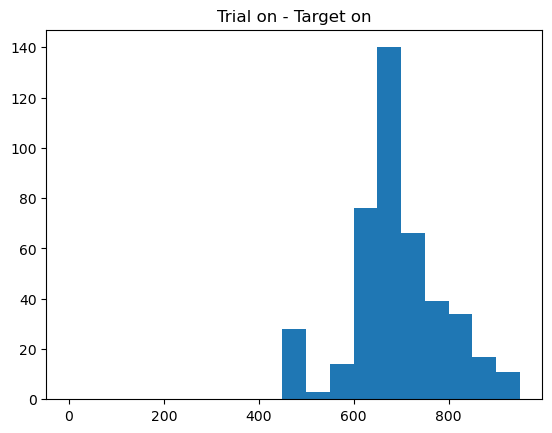

In [5]:
plt.close('all')
plt.hist(node_df.query('(step==0) & (trialerror==0)').t_on.values - trial_df.query('trialerror==0').start_time.values,
         bins=np.arange(0,1000,50))
plt.title('Trial on - Target on')

Text(0.5, 1.0, 'Action on - Target on')

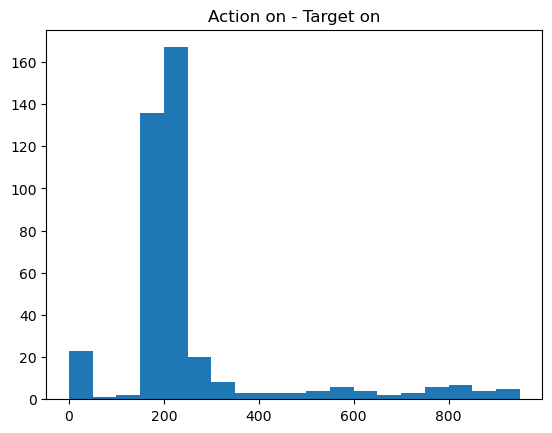

In [6]:
plt.close('all')
plt.hist(choice_df.query('(step==0) & (trialerror==0)').t_on.values - node_df.query('(step==0) & (trialerror==0)').t_on.values,
         bins=np.arange(0,1000,50))
plt.title('Action on - Target on')

Text(0.5, 1.0, 'Action on - Target on')

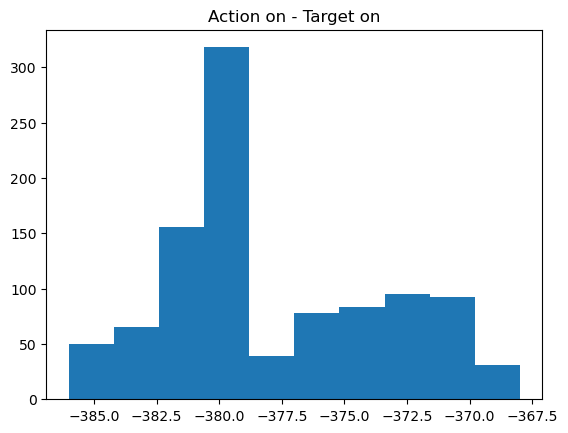

In [10]:
plt.close('all')
plt.hist(choice_df.query('(step>0) & (trialerror==0)').t_on.values - node_df.query('(step>0) & (trialerror==0)').t_on.values)
         #bins=np.arange(0,1000,50))
plt.title('Action on - Target on')